In [11]:
#yahoo finance as data source
#pip install yfinance
import yfinance as yf

In [12]:
#See the yahoo finance ticker for your stock symbol
stock_symbol = 'AAPL'

In [13]:
#last 5 years data with interval of 1 day
data = yf.download(tickers=stock_symbol,period='5y',interval='1d')

[*********************100%%**********************]  1 of 1 completed


In [14]:
type(data)

pandas.core.frame.DataFrame

In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-02-22,42.895000,43.250000,42.845001,43.242500,41.629520,75652800
2019-02-25,43.540001,43.967499,43.487499,43.557499,41.932755,87493600
2019-02-26,43.427502,43.825001,43.292500,43.582500,41.956825,68280800
2019-02-27,43.302502,43.750000,43.182499,43.717499,42.086781,111341600
2019-02-28,43.580002,43.727501,43.230000,43.287498,41.672829,112861600


In [16]:
len(data)

1259

In [17]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-02-15,183.550003,184.490005,181.350006,183.860001,183.860001,65434500
2024-02-16,183.419998,184.850006,181.669998,182.309998,182.309998,49701400
2024-02-20,181.789993,182.429993,180.000000,181.559998,181.559998,53665600
2024-02-21,181.940002,182.889999,180.660004,182.320007,182.320007,41371400
2024-02-22,181.940002,184.190002,182.524002,182.982498,182.982498,10620655


In [18]:
opn = data[['Open']]

<Axes: xlabel='Date'>

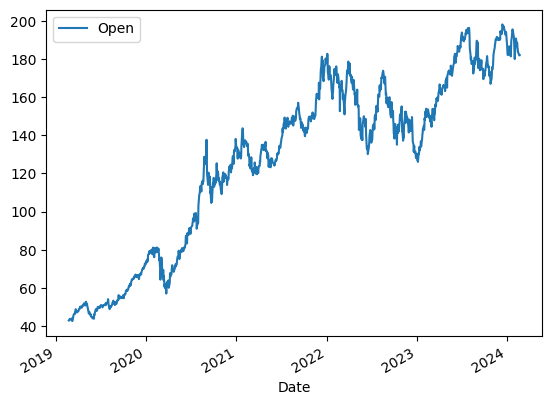

In [19]:
opn.plot()

In [20]:
import matplotlib.pyplot as plt

In [21]:
ds = opn.values

In [22]:
ds

array([[ 42.89500046],
       [ 43.54000092],
       [ 43.42750168],
       ...,
       [181.78999329],
       [181.94000244],
       [181.94000244]])

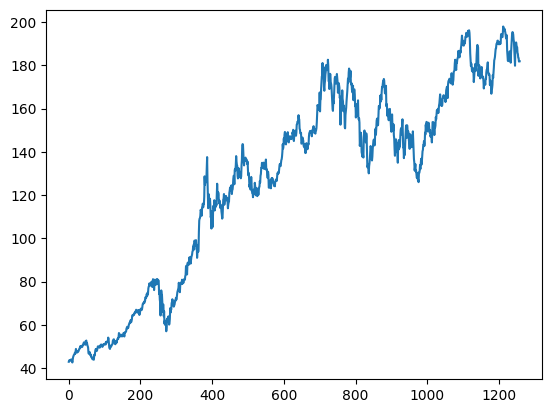

In [23]:
plt.plot(ds)

In [24]:
import numpy as np

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
#Using MinMaxScaler for normalizing data between 0 & 1
normalizer = MinMaxScaler(feature_range=(0,1))
ds_scaled = normalizer.fit_transform(np.array(ds).reshape(-1,1))

In [27]:
len(ds_scaled), len(ds)

(1259, 1259)

In [28]:
#Defining test and train data sizes
train_size = int(len(ds_scaled)*0.70)
test_size = len(ds_scaled) - train_size

In [29]:
train_size,test_size

(881, 378)

In [30]:
#Splitting data between train and test
ds_train, ds_test = ds_scaled[0:train_size,:], ds_scaled[train_size:len(ds_scaled),:1]

In [31]:
len(ds_train),len(ds_test)

(881, 378)

In [32]:
print(ds_test)

[[0.81774317]
 [0.80095212]
 [0.80249616]
 [0.8118888 ]
 [0.82340455]
 [0.7628023 ]
 [0.76910706]
 [0.75739831]
 [0.73378793]
 [0.75379565]
 [0.73269427]
 [0.72207928]
 [0.72092123]
 [0.72626092]
 [0.75276629]
 [0.75476062]
 [0.72188619]
 [0.72098553]
 [0.69885488]
 [0.68663146]
 [0.71294384]
 [0.73829126]
 [0.70638189]
 [0.69872619]
 [0.68888317]
 [0.7086979 ]
 [0.67588778]
 [0.66598046]
 [0.63497166]
 [0.61522133]
 [0.65909673]
 [0.65292077]
 [0.66411473]
 [0.64307765]
 [0.62943898]
 [0.62609361]
 [0.62114   ]
 [0.59450593]
 [0.65446471]
 [0.63362072]
 [0.66205611]
 [0.63760936]
 [0.64616573]
 [0.64520067]
 [0.67299279]
 [0.69164946]
 [0.69724655]
 [0.67865417]
 [0.67949044]
 [0.7113999 ]
 [0.72375192]
 [0.68431545]
 [0.63998967]
 [0.64018266]
 [0.6081446 ]
 [0.62937468]
 [0.61708696]
 [0.63471437]
 [0.66417913]
 [0.68444414]
 [0.70535253]
 [0.6854735 ]
 [0.66810338]
 [0.70593151]
 [0.69209985]
 [0.67904015]
 [0.68753212]
 [0.68019811]
 [0.6598044 ]
 [0.65433601]
 [0.63574363]
 [0.67

In [33]:
#creating dataset in time series for LSTM model 
#X[100,120,140,160,180] : Y[200]
def create_ds(dataset,step):
    Xtrain, Ytrain = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtrain.append(a)
        Ytrain.append(dataset[i + step, 0])
    return np.array(Xtrain), np.array(Ytrain)

In [34]:
def create_ds1(dataset,step):
    Xtest, Ytest = [], []
    for i in range(len(dataset)-step-1):
        a = dataset[i:(i+step), 0]
        Xtest.append(a)
        Ytest.append(dataset[i + step, 0])
    return np.array(Xtest), np.array(Ytest)



In [35]:
#Taking 100 days price as one record for training
time_stamp = 100
X_train, y_train = create_ds(ds_train,time_stamp)
# X_test, y_test = create_ds1(ds_test,time_stamp)

In [36]:
X_train.shape,y_train.shape

((780, 100), (780,))

In [37]:
#Taking 100 days price as one record for training
time_stamp = 100
# X_train, y_train = create_ds(ds_train,time_stamp)
X_test, y_test = create_ds1(ds_test,time_stamp)


In [38]:
X_test.shape, y_test.shape

((277, 100), (277,))

In [39]:
#Reshaping data to fit into LSTM model
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)



In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Plotting the MSE errors

window_size = 20
N = ds_train.size
std_avg_predictions = []
mse_errors = []

for pred_idx in range(window_size, N):
    std_avg_predictions.append(np.mean(ds_train[pred_idx - window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1] - ds_train[pred_idx]) ** 2)

mse = np.mean(mse_errors)
# print('MSE error for standard averaging: %.5f' % mse)


In [41]:
all_mid_data = np.concatenate([ds_train,ds_test],axis=0)
print(all_mid_data)

[[0.0020265 ]
 [0.00617601]
 [0.00545226]
 ...
 [0.89558665]
 [0.89655171]
 [0.89655171]]


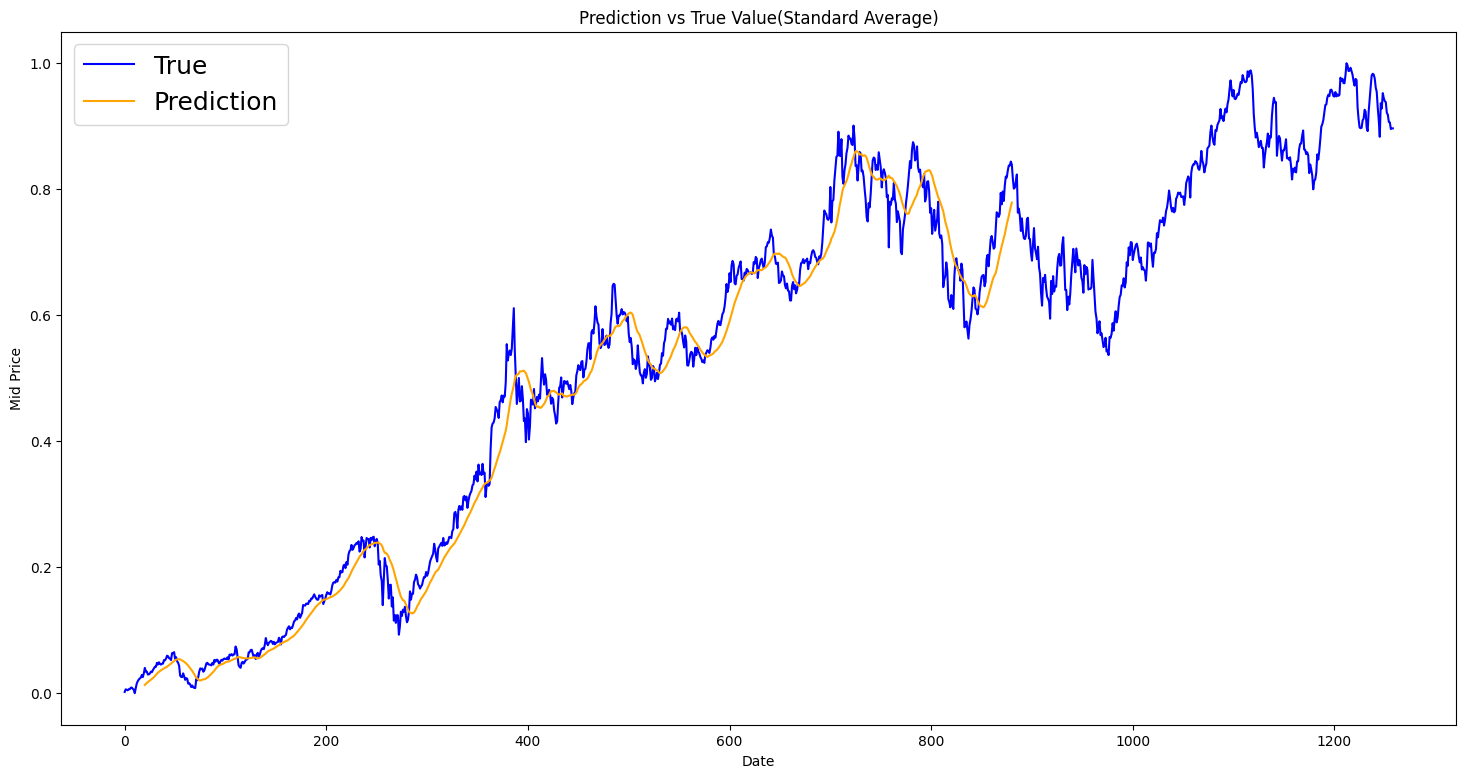

In [42]:

plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(window_size,N),std_avg_predictions,color='orange',label='Prediction')
# plt.xticks(range(0,data.shape[0],50),data['Date'].loc[::50],rotation=45)
plt.title('Prediction vs True Value(Standard Average)')
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()


In [43]:
window_size = 50
N = ds_train.size

run_avg_predictions = []
run_avg_x = []

mse_errors = []

running_mean = 0.0
run_avg_predictions.append(running_mean)

decay = 0.5

for pred_idx in range(1,N):

    running_mean = running_mean*decay + (1.0-decay)*ds_train[pred_idx-1]
    run_avg_predictions.append(running_mean)
    mse_errors.append((run_avg_predictions[-1]-ds_train[pred_idx])**2)
    run_avg_x.append('date')

print('MSE error for EMA averaging: %.5f'%(0.5*np.mean(mse_errors)))


MSE error for EMA averaging: 0.00015


In [44]:
# print(np.array(range(0, N)).shape)
print(np.array(run_avg_predictions).shape)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (881,) + inhomogeneous part.

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (881,) + inhomogeneous part.

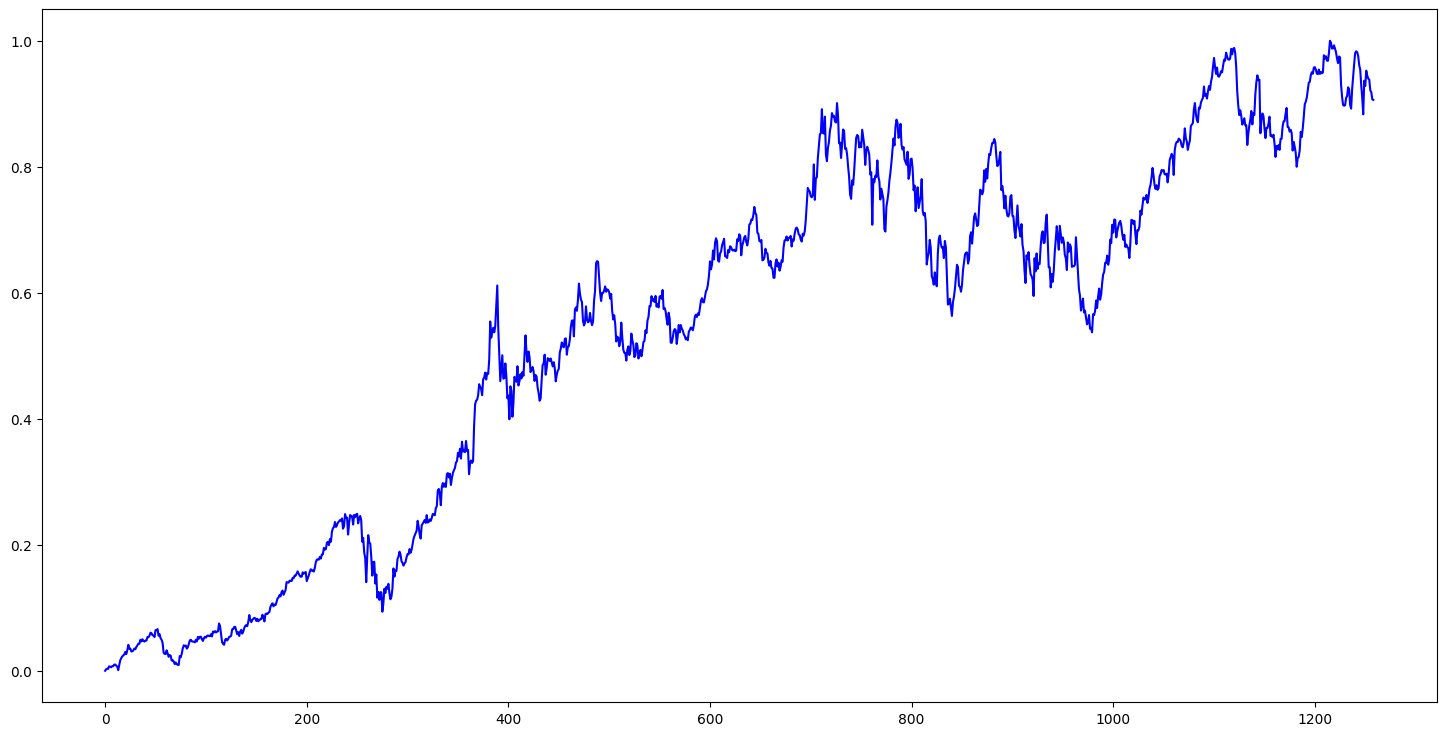

In [ ]:

plt.figure(figsize = (18,9))
plt.plot(range(data.shape[0]),all_mid_data,color='b',label='True')
plt.plot(range(0,N),run_avg_predictions,color='orange', label='Prediction')
#plt.xticks(range(0,df.shape[0],50),df['Date'].loc[::50],rotation=45)
plt.xlabel('Date')
plt.ylabel('Mid Price')
plt.legend(fontsize=18)
plt.show()


In [ ]:
import datetime as dt

In [ ]:
window_size = 100
N = ds_train.size
std_avg_predictions = []
std_avg_x = []
mse_errors = []

for pred_idx in range(window_size,N):

    if pred_idx >= N:
        date = dt.datetime.strptime('2022-01-01','%Y-%m-%d').date() + dt.timedelta(days=1)
    else:
        date = data.loc[pred_idx,'Date']

    std_avg_predictions.append(np.mean(ds_train[pred_idx-window_size:pred_idx]))
    mse_errors.append((std_avg_predictions[-1]-ds_train[pred_idx])**2)
    std_avg_x.append(date)

print('MSE error for standard averaging: %.5f'%(0.5*np.mean(mse_errors)))


KeyError: 'Date'

In [ ]:
# from keras.models import Sequential
# from keras.layers import Dense, LSTM

In [ ]:
# #Creating LSTM model using keras
# model = Sequential()
# model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
# model.add(LSTM(units=50,return_sequences=True))
# model.add(LSTM(units=50))
# model.add(Dense(units=1,activation='linear'))
# model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_2 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# #Training model with adam optimizer and mean squared error loss function
# model.compile(loss='mean_squared_error',optimizer='adam')
# model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Train on 761 samples, validate on 269 samples
Epoch 1/100
761/761 [==============================] - 13s 17ms/step - loss: 0.2048 - val_loss: 0.0253
Epoch 2/100
761/761 [==============================] - 10s 13ms/step - loss: 0.0197 - val_loss: 0.0112
Epoch 3/100
761/761 [==============================] - 10s 14ms/step - loss: 0.0088 - val_loss: 0.0101
Epoch 4/100
761/761 [==============================] - 11s 14ms/step - loss: 0.0065 - val_loss: 0.0134
Epoch 5/100
761/761 [==============================] - 10s 13ms/step - loss: 0.0051 - val_loss: 0.0083
Epoch 6/100
761/761 [==============================] - 10s 13ms/step - loss: 0.0044 - val_loss: 0.0071
Epoch 7/100
761/761 [==============================] - 10s 14ms/step - loss: 0.0039 - val_loss: 0.0065
Epoch 8/100
761/761 [==============================] - 10s 13ms/step - loss: 0.0034 - val_loss: 0.0053
Epoch 9/100
761/761 [==============================] - 10s 13ms/step - loss: 0.0031 - val_loss: 0.0047
Epoch 10/100
761/761 [=====

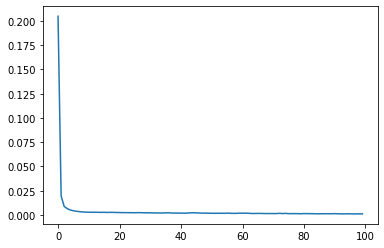

In [ ]:
# #PLotting loss, it shows that loss has decreased significantly and model trained well
# loss = model.history.history['loss']
# plt.plot(loss)

In [ ]:
# #Predicitng on train and test data
# train_predict = model.predict(X_train)
# test_predict = model.predict(X_test)

In [ ]:
# #Inverse transform to get actual value
# train_predict = normalizer.inverse_transform(train_predict)
# test_predict = normalizer.inverse_transform(test_predict)

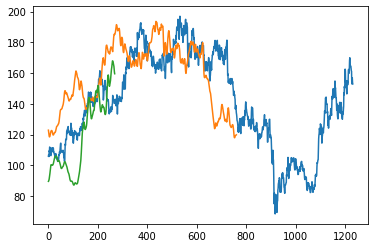

In [ ]:
# #Comparing using visuals
# plt.plot(normalizer.inverse_transform(ds_scaled))
# plt.plot(train_predict)
# plt.plot(test_predict)

In [ ]:
# type(train_predict)

numpy.ndarray

In [ ]:
# test = np.vstack((train_predict,test_predict))

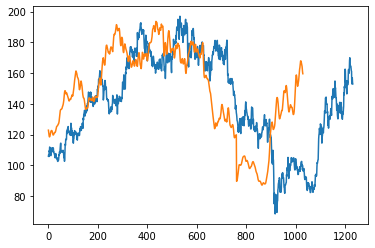

In [ ]:
# #Combining the predited data to create uniform data visualization
# plt.plot(normalizer.inverse_transform(ds_scaled))
# plt.plot(test)

In [ ]:
# len(ds_test)

370

In [ ]:
# #Getting the last 100 days records
# fut_inp = ds_test[270:]

In [ ]:
# fut_inp = fut_inp.reshape(1,-1)

In [ ]:
# tmp_inp = list(fut_inp)

In [ ]:
# fut_inp.shape

(1, 100)

In [ ]:
#Creating list of the last 100 data
tmp_inp = tmp_inp[0].tolist()

In [ ]:
#Predicting next 30 days price suing the current data
#It will predict in sliding window manner (algorithm) with stride 1
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(tmp_inp)>100):
        fut_inp = np.array(tmp_inp[1:])
        fut_inp=fut_inp.reshape(1,-1)
        fut_inp = fut_inp.reshape((1, n_steps, 1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        tmp_inp = tmp_inp[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        fut_inp = fut_inp.reshape((1, n_steps,1))
        yhat = model.predict(fut_inp, verbose=0)
        tmp_inp.extend(yhat[0].tolist())
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[[0.6947309970855713], [0.6953206062316895], [0.7002814412117004], [0.7073392271995544], [0.715061366558075], [0.7226243615150452], [0.729603111743927], [0.7358121275901794], [0.7412080764770508], [0.7458339333534241], [0.7497867345809937], [0.7531965374946594], [0.7562095522880554], [0.758974552154541], [0.761631965637207], [0.7643031477928162], [0.7670859694480896], [0.7700509428977966], [0.7732412219047546], [0.776674747467041], [0.780346691608429], [0.7842351198196411], [0.7883058786392212], [0.7925163507461548], [0.7968212962150574], [0.8011761903762817], [0.8055402040481567], [0.8098787069320679], [0.8141643404960632], [0.8183774948120117]]


In [ ]:
len(ds_scaled)

1232

In [ ]:
#Creating a dummy plane to plot graph one after another
plot_new=np.arange(1,101)
plot_pred=np.arange(101,131)

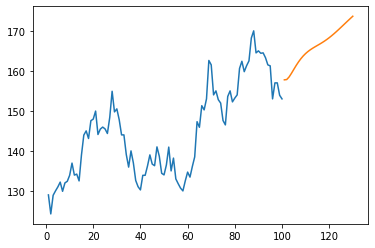

In [ ]:
plt.plot(plot_new, normalizer.inverse_transform(ds_scaled[1132:]))
plt.plot(plot_pred, normalizer.inverse_transform(lst_output))

In [ ]:
ds_new = ds_scaled.tolist()

In [ ]:
len(ds_new)

1232

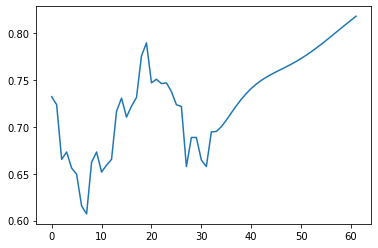

In [ ]:
#Entends helps us to fill the missing value with approx value
ds_new.extend(lst_output)
plt.plot(ds_new[1200:])

In [ ]:
#Creating final data for plotting
final_graph = normalizer.inverse_transform(ds_new).tolist()

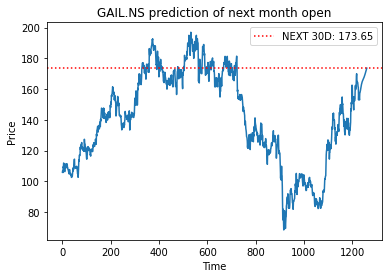

In [ ]:
# #Plotting final results with predicted value after 30 Days
# plt.plot(final_graph,)
# plt.ylabel("Price")
# plt.xlabel("Time")
# plt.title("{0} prediction of next month open".format(stock_symbol))
# plt.axhline(y=final_graph[len(final_graph)-1], color = 'red', linestyle = ':', label = 'NEXT 30D: {0}'.format(round(float(*final_graph[len(final_graph)-1]),2)))
# plt.legend()

